# SVM with TF-IDF Vectorization on Italian Data



In [ ]:
from time import time

# Data Cleaning/Preprocessing

In [ ]:
train_it.Tweet = train_it.Tweet.apply(clean,lang='IT')
val_it.Tweet = val_it.Tweet.apply(clean,lang='IT')
test_it.Tweet = test_it.Tweet.apply(clean,lang='IT')

X_train, y_train =  train_it['Tweet'],train_it['Stance']
X_val, y_val =  val_it['Tweet'],val_it['Stance']
X_test, y_test =  test_it['Tweet'],test_it['Stance']

# TF-IDF Vectorization

In [ ]:
svc_prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='Tweet')),
              ('tf-idf', TfidfVectorizer()),
              ('svc', SVC(random_state=1,kernel='rbf',max_iter=1000))
              ])
svc_pipeline_tuned = Pipeline([
              ('selector', ItemSelector(key='Tweet')),
              ('tf-idf', TfidfVectorizer()),
              ])

svc_parameters = {
    "svc__C": [ 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [1,0.1,0.01,0.001,0.0001]
}

100%|██████████| 2774/2774 [00:51<00:00, 54.27it/s]


# Hyperparameter Tuning using GridSearch

In [ ]:
# grid serach for hyperparamter tuning - ignore this part if parameter tuning is not required
#gridsearch(svc_prediction_pipeline,svc_parameters,train_it,y_train)

# Training and Validation

Evaluation for: LR with Multilingual Encoding : Validation
              precision    recall  f1-score   support

     AGAINST      0.646     0.681     0.663       901
       FAVOR      0.749     0.785     0.766      1327
     NEUTRAL      0.695     0.548     0.613       540

    accuracy                          0.705      2768
   macro avg      0.697     0.672     0.681      2768
weighted avg      0.705     0.705     0.703      2768



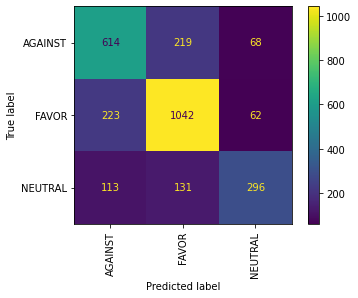

In [ ]:
#SVC with Countvectorization. Passing tuned paramters. 
count_train_tuned = svc_pipeline_tuned.fit_transform(train_it)
count_validation_tuned = svc_pipeline_tuned.transform(val_it)
count_test_tuned = svc_pipeline_tuned.transform(test_it)

svc_model = SVC(random_state=1, C=input_C, gamma=input_gamma,kernel='rbf',max_iter=1000)
tr_tuned_model = svc_model.fit(count_train_tuned,y_train)

#validation set
svc_tuned_val = svc_model.predict(count_validation_tuned)
evaluation_summary("Italian : SVC with TfidfVectorizer: Validation set", y_val, svc_tuned_val , dataset['labels'])
ConfusionMatrixDisplay.from_predictions(y_val,svc_tuned_val,xticks_rotation='vertical')

# Prediction on Test Set

Evaluation for: LR with Multilingual Encoding : Test
              precision    recall  f1-score   support

     AGAINST      0.628     0.692     0.659       903
       FAVOR      0.736     0.763     0.749      1329
     NEUTRAL      0.667     0.494     0.568       542

    accuracy                          0.687      2774
   macro avg      0.677     0.650     0.659      2774
weighted avg      0.688     0.687     0.684      2774



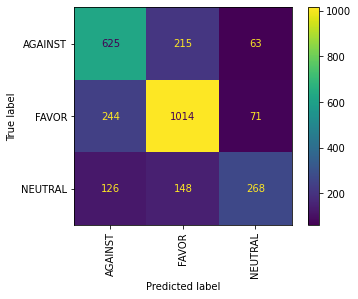

In [ ]:
predictions = svc_model.predict(count_test_tuned)
evaluation_summary("Italian : SVC with TfidfVectorizer: Test set", y_test, predictions , dataset['labels'])
ConfusionMatrixDisplay.from_predictions(y_test,predictions,xticks_rotation='vertical')

In [ ]:
f1score(y_test, predictions)

Micro Average Precision :  0.7051189617880317
Micro Average Recall :  0.7051189617880317
Micro Average F1-Score :  0.7051189617880317
............................
Macro Average Precision :  0.6951158383571525
Macro Average Recall :  0.6864330641686535
Macro Average F1-Score :  0.6897175200240867
